# Stock Analysis
The idea of this project was to analyze how the stock of the biggest companies in the world behave when there is a day that has a big price change for a time interval. 
My claim is that if the price changes more two times or three times the mean price change of the stock for a time interval, then for the next time interval the price change will go in the opposite direction. 

## Imports

In [132]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
from dateutil.relativedelta import relativedelta

## Downloading data

In [133]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'TSLA']

# by default the interval will be '1d'
# if another interval is desired just set the first value of the list to 1, 
# and 0 for the other intervals
intervals = {'days': (1, '1d'), 'weeks': (0, '1wk'), 'months': (0, '1mo')}

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime.today()

# finding the right interval 
for value in intervals.values():
    if value[0] == 1: 
        interval = value[1]
        break

yf.pdr_override()

df = data.get_data_yahoo(tickers, start_date, end_date, interval=interval)

[*********************100%***********************]  7 of 7 completed


In [134]:
# visualizing the DataFrame
df.tail(5)

Adj Close                                                  \
                  AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-05-22  174.199997  115.010002  125.050003  248.320007  321.179993   
2023-05-23  171.559998  114.989998  122.559998  246.740005  315.260010   
2023-05-24  171.839996  116.750000  120.900002  249.210007  313.850006   
2023-05-25  172.990005  115.000000  123.480003  252.690002  325.920013   
2023-05-26  175.250000  120.945000  124.501602  261.459991  332.774994   

                                         Close                          ...  \
                  NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                    ...   
2023-05-22  311.760010  188.869995  174.199997  115.010002  125.050003  ...   
2023-05-23  306.880005  185.770004  171.559998  114.989998  122.559998  ...   
2023-05-24  305.380005  182.899994  171.839996  116.750000  120.900002  ...   
2023-05-25  379.799988  184.470001  172.990005  115.000000  123.480003  ...   
2023-05-26  388.462189  196.333603  175.250000  120.945000  124.501602  ...   

                  Open                            Volume            \
                  MSFT        NVDA        TSLA      AAPL      AMZN   
Date                                                                 
2023-05-22  318.600006  309.010010  180.699997  43570900  70741100   
2023-05-23  320.029999  310.000000  186.199997  50747300  67576300   
2023-05-24  314.730011  302.100006  182.229996  45143500  63487900   
2023-05-25  323.239990  385.230011  186.539993  56017900  66433100   
2023-05-26  324.019989  378.899994  184.619995  34347082  68308543   

                                                                      
                 GOOGL        META      MSFT       NVDA         TSLA  
Date                                                                  
2023-05-22  35253000.0  27738500.0  24115700   37200000  132001400.0  
2023-05-23  34046300.0  17748100.0  30797200   35625300  156952100.0  
2023-05-24  34182600.0  17724300.0  23384900   72141900  137605100.0  
2023-05-25  42300600.0  22352600.0  43231800  154241200   96598200.0  
2023-05-26  23021688.0  16894134.0  24146351   55307289  131983820.0  

[5 rows x 42 columns]

## Setup for analysis 
I need to get the difference between 'Open' and 'Close' price, to be able to find the mean and then further analyze the behavior of the changes. 
Note that below I save both the absolute change ('abs_change') and the regular change ('change') because I use the absolute change to find the mean change for the given time intervals, and I use the regular price change to be able to see the direction of the price movement. 

In [135]:
abs_change = (abs(df['Open'] - df['Close']) / df['Open']) * 100
change = ((df['Open'] - df['Close']) / df['Open']) * 100

diff = pd.concat({'difference': change, 'absolute difference': abs_change}, axis=1)

mean = diff['absolute difference'].mean()

In [136]:
# visualizing the 'diff' DataFrame and the mean of each ticker
diff.tail(5)

difference                                                    \
                 AAPL      AMZN     GOOGL      META      MSFT      NVDA   
Date                                                                      
2023-05-22  -0.126452  1.507232 -1.716285 -1.185772 -0.809789 -0.889939   
2023-05-23   0.906837 -0.630088  1.288665  0.028359  1.490482  1.006450   
2023-05-24  -0.438366 -1.213699  0.181639 -1.602254  0.279606 -1.085733   
2023-05-25  -0.336408  1.397580  0.835202  0.280186 -0.829113  1.409554   
2023-05-26  -1.113543 -4.226990 -1.081111 -3.372474 -2.701995 -2.523672   

                     absolute difference                                \
                TSLA                AAPL      AMZN     GOOGL      META   
Date                                                                     
2023-05-22 -4.521305            0.126452  1.507232  1.716285  1.185772   
2023-05-23  0.230931            0.906837  0.630088  1.288665  0.028359   
2023-05-24 -0.367666            0.438366  1.213699  0.181639  1.602254   
2023-05-25  1.109677            0.336408  1.397580  0.835202  0.280186   
2023-05-26 -6.344712            1.113543  4.226990  1.081111  3.372474   

                                          
                MSFT      NVDA      TSLA  
Date                                      
2023-05-22  0.809789  0.889939  4.521305  
2023-05-23  1.490482  1.006450  0.230931  
2023-05-24  0.279606  1.085733  0.367666  
2023-05-25  0.829113  1.409554  1.109677  
2023-05-26  2.701995  2.523672  6.344712

In [137]:
# visualizing the mean of each ticker
mean

AAPL     1.429564
AMZN     1.711702
GOOGL    1.077757
META     1.336306
MSFT     1.077758
NVDA     2.187949
TSLA     2.127329
dtype: float64

In [138]:
def create_dict():
    """
    This function returns a dictionary where the key are the tickers
    and the values are empty lists
    """
    d = {}
    for ticker in tickers:
        d[ticker] = []
    return d

## Analysis 

First I will find all the dates that have a high price change compared to the mean change.

In [139]:
# assigning the value of 'considerable_change'
# 'considerable_change' is the multiplier to the mean price 
considerable_change = 2

In [140]:
dates_surpassed_mean = create_dict()

for row in diff['absolute difference'].itertuples():
    for ticker in tickers:
        if getattr(row, ticker) > mean.get(key=ticker) * considerable_change:
            dates_surpassed_mean[ticker].append(row.Index)

### Plotting distribution
Plotting the distribution throughout the years when there was intervals that had a considerable price change, so that we can see if there were such changes in the recent years. 

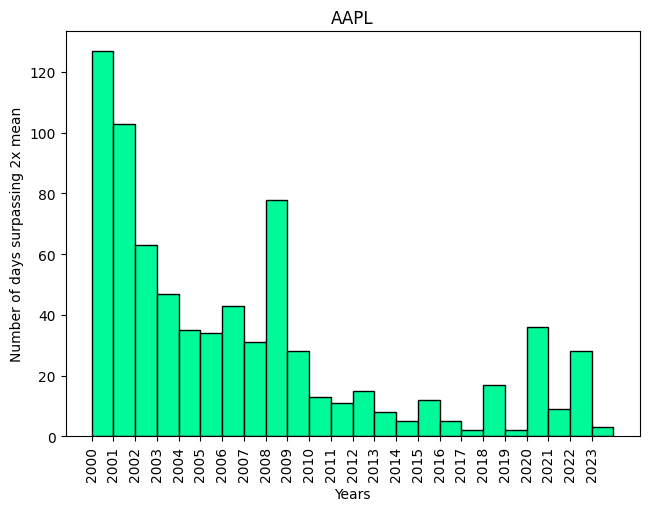

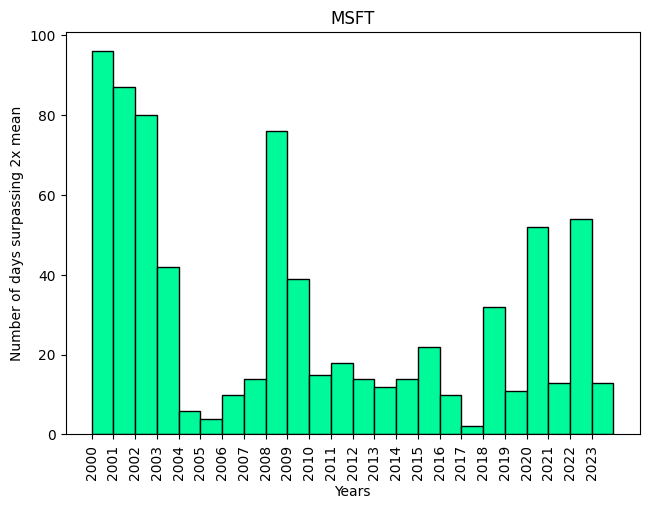

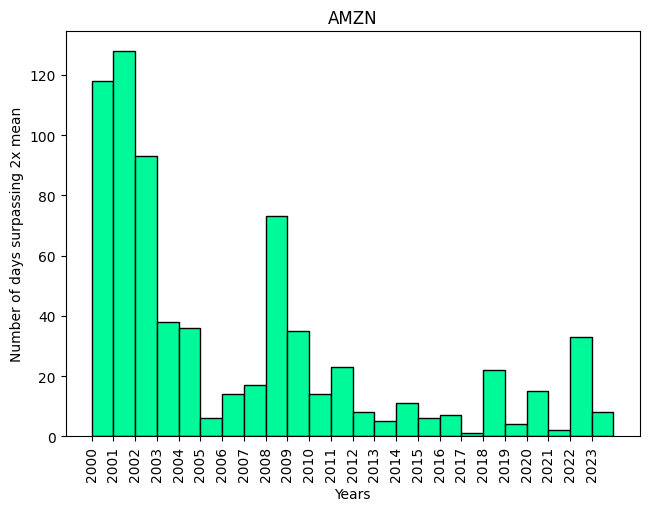

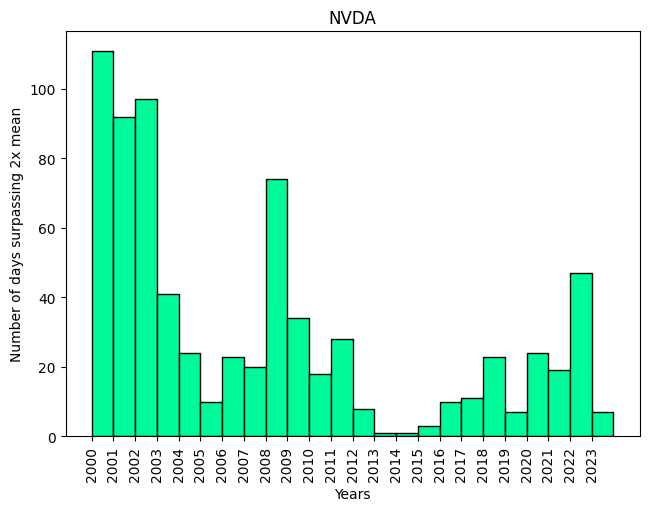

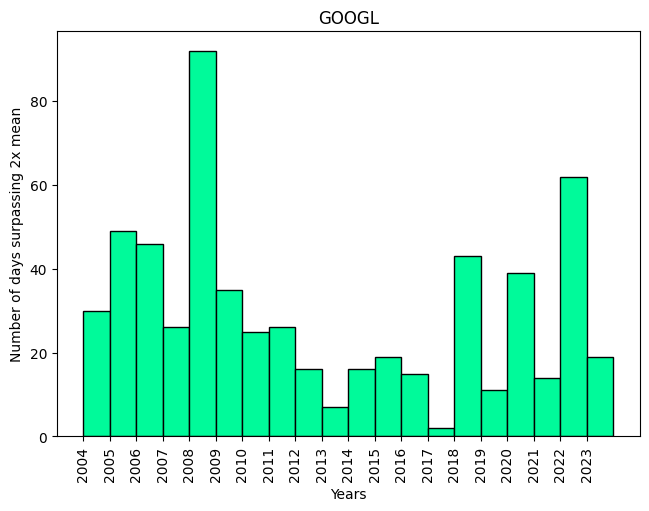

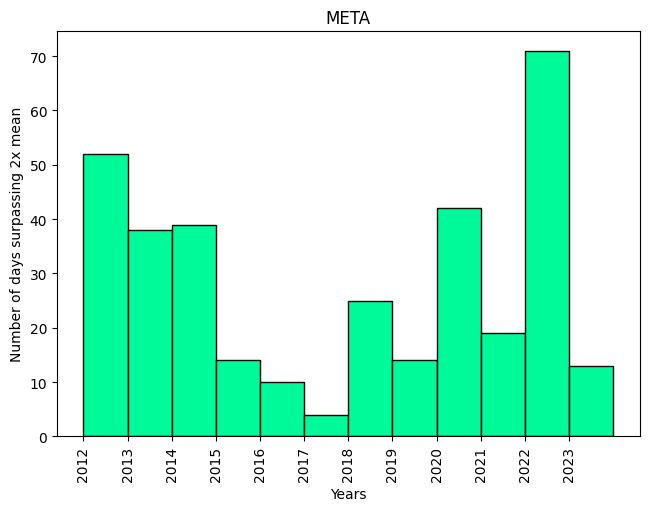

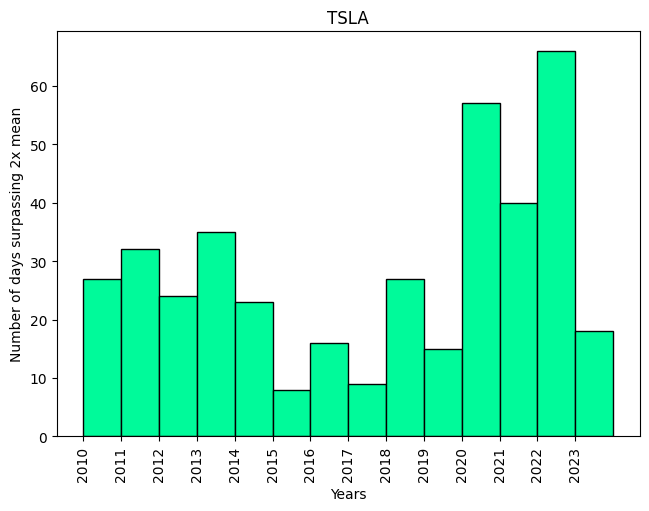

In [141]:
for ticker in tickers:
    years = [date.year for date in dates_surpassed_mean[ticker]] # creating this list of just years to create the histograms
    if years == []:
        continue
    plt.hist(years, bins=range(min(years), max(years) + 2), color='mediumspringgreen', edgecolor='black')
    plt.xticks(range(min(years), max(years) + 1), rotation=90)
    plt.tight_layout()
    plt.xlabel('Years')
    plt.ylabel('Number of days surpassing 2x mean')
    plt.title(ticker)
    plt.show()

### Analyzing the next day
Going over the original data to see how the next day after the drastic price change behaved.

In [142]:
opposite_direction = create_dict()
same_direction = create_dict()
all_dates_values = create_dict()

for ticker in tickers:
    for date in dates_surpassed_mean[ticker]:
        next_date = date + relativedelta(days=intervals['days'][0], weeks=intervals['weeks'][0], months=intervals['months'][0])
        # this approach below if date is a friday, 
        # then we do not consider that the next day
        if next_date not in diff.index:
            continue

        # I need to see in what direction the current day went
        # and then find the direction that the next day went
        curr_change =  diff.loc[date]['difference'][ticker]
        next_change = diff.loc[next_date]['difference'][ticker]
        
        tup = (date, curr_change, next_change)
        all_dates_values[ticker].append(tup)
        
        if curr_change * next_change < 0:
            opposite_direction[ticker].append(tup)
        else:
            same_direction[ticker].append(tup)

In [143]:
# the values in the dictionary 
all_dates_values['AAPL'][:5]

[(Timestamp('2000-01-03 00:00:00'), -6.734198532048259, 5.311744992331711),
 (Timestamp('2000-01-04 00:00:00'), 5.311744992331711, -0.24095014930776135),
 (Timestamp('2000-01-06 00:00:00'), 10.482987314658015, -3.108838398914396),
 (Timestamp('2000-01-10 00:00:00'), 4.16661948937922, 3.322498634761179),
 (Timestamp('2000-01-11 00:00:00'), 3.322498634761179, 8.223626029106573)]

Below, in order to find the probability that the day after a day that had a change 2 times the mean change we need to divide the number of days where it behaved as expected, which we can get from the 'confirmed_strategy' dictionary, by the total number of days that we had a change greater than 2 times the mean, which we can get from the dates 'dates_surpassed_mean' dictionary.

In [144]:
probability_dict = {}
for ticker in tickers:
    if not dates_surpassed_mean[ticker]: # this is faster than checking if the len is 0 or if the list is []
        continue
    print('{}: Strategy confirmed: {}, Total: {}'.format(ticker, len(opposite_direction[ticker]), len(all_dates_values[ticker])))
    probability_dict[ticker] = len(opposite_direction[ticker]) / len(all_dates_values[ticker])

AAPL: Strategy confirmed: 336, Total: 612
MSFT: Strategy confirmed: 316, Total: 573
AMZN: Strategy confirmed: 305, Total: 568
NVDA: Strategy confirmed: 307, Total: 588
GOOGL: Strategy confirmed: 271, Total: 477
META: Strategy confirmed: 151, Total: 269
TSLA: Strategy confirmed: 171, Total: 331


In [145]:
# visualizing the probability dictionary
probability_dict

{'AAPL': 0.5490196078431373,
 'MSFT': 0.5514834205933682,
 'AMZN': 0.5369718309859155,
 'NVDA': 0.5221088435374149,
 'GOOGL': 0.5681341719077568,
 'META': 0.5613382899628253,
 'TSLA': 0.5166163141993958}

In [146]:
# the probability that the stock goes in the same direction as the previous day
probability_dict_inverse = {ticker: 1 - prob for ticker, prob in probability_dict.items()}
probability_dict_inverse

{'AAPL': 0.4509803921568627,
 'MSFT': 0.4485165794066318,
 'AMZN': 0.4630281690140845,
 'NVDA': 0.47789115646258506,
 'GOOGL': 0.43186582809224316,
 'META': 0.4386617100371747,
 'TSLA': 0.4833836858006042}

### Plotting the distribution again with the intervals that the strategy worked over it.
The green bars are the total possibilities, and the magenta bars over it represent the number of times where the strategy actually worked, so it is opportunities versus confirmed strategy. 

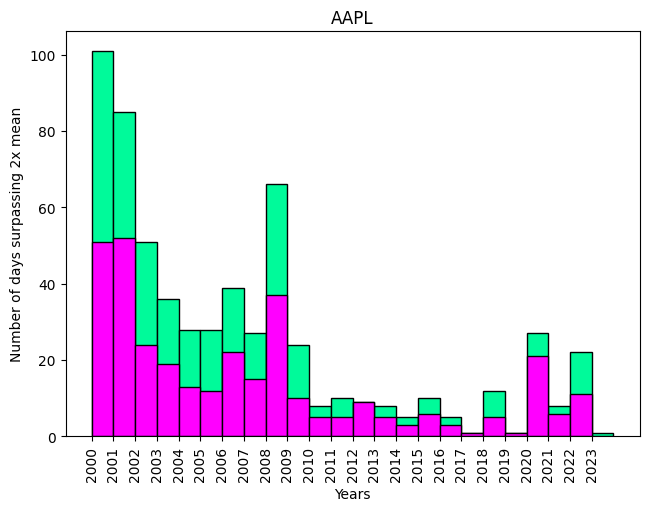

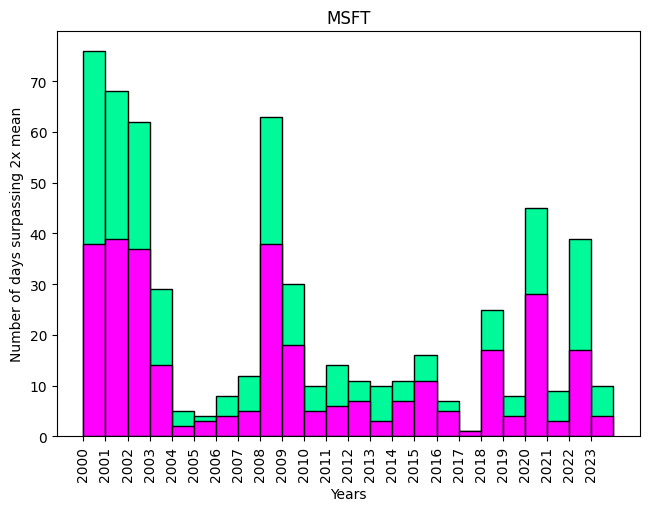

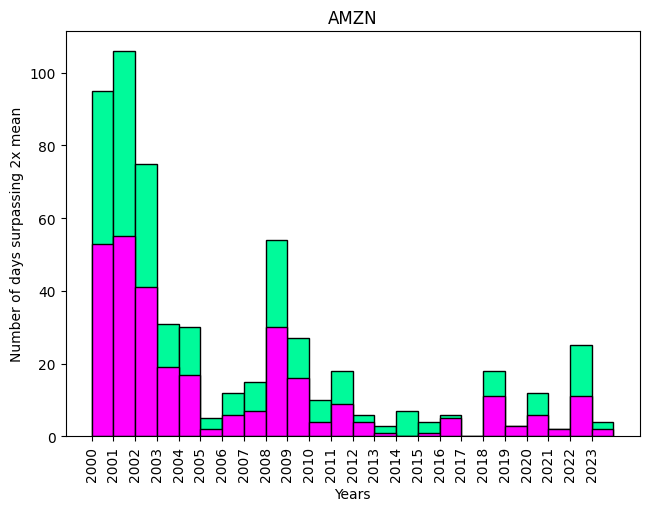

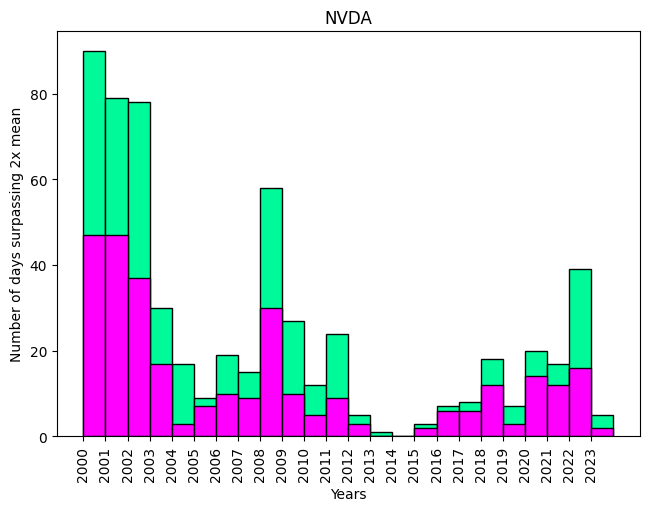

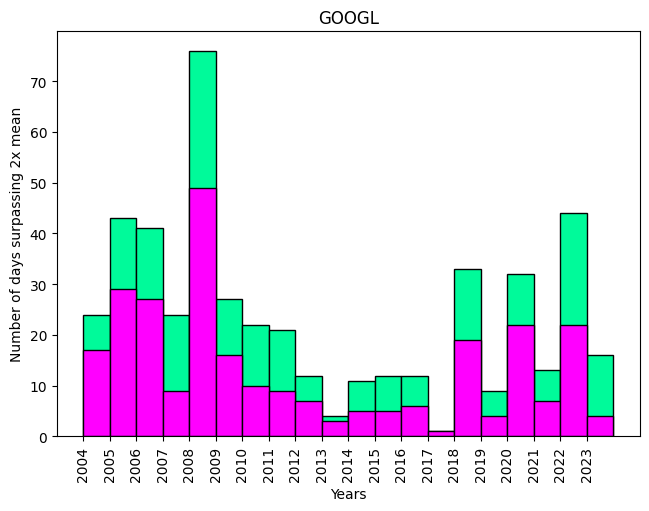

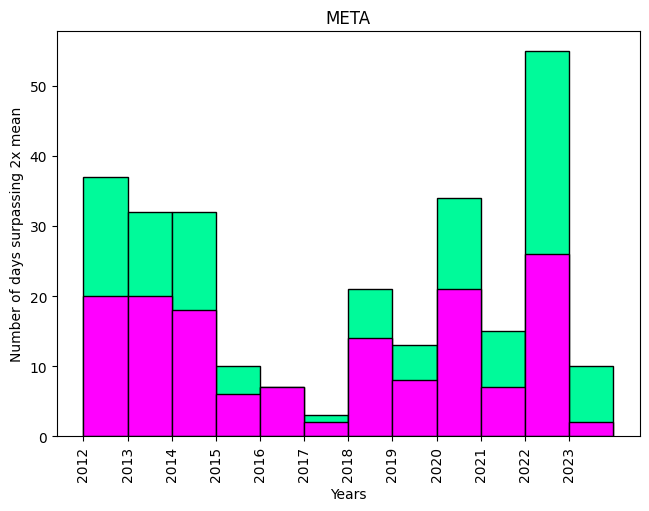

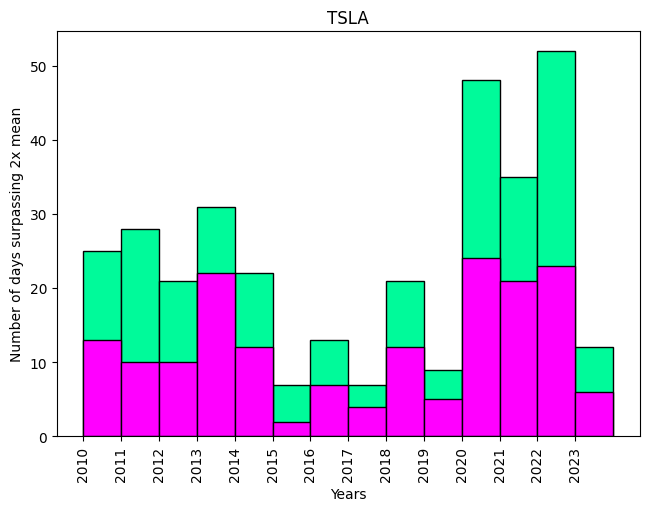

In [147]:
for ticker in tickers:
    years_all_dates = [tup[0].year for tup in all_dates_values[ticker]] # creating this list of just years to create the histograms
    years_confirmed = [tup[0].year for tup in opposite_direction[ticker]]
    if years == []:
        continue
    plt.hist(years_all_dates, bins=range(min(years_all_dates), max(years_all_dates) + 2), color='mediumspringgreen', edgecolor='black')
    plt.hist(years_confirmed, bins=range(min(years_confirmed), max(years_confirmed) + 2), color='magenta', edgecolor='black')
    plt.xticks(range(min(years_all_dates), max(years_all_dates) + 1), rotation=90)
    plt.tight_layout()
    plt.xlabel('Years')
    plt.ylabel('Number of days surpassing 2x mean')
    plt.title(ticker)
    plt.show()

### Analyzing average gain and average loss
Now I need to analyze the mean change of the next interval for both when it goes in direction as the interval before and when it goes in the opposite direction, because I need to know the expected loss and gain from the strategy. 

In [148]:
# I want to find the average change when it goes in the same direction
# and when it goes in the opposite direction 
avg_gain = create_dict()
avg_loss = create_dict()

for ticker in tickers: 
    sum_gain = 0
    for tup in opposite_direction[ticker]:
        sum_gain += abs(tup[-1]) # I need to use absolute value here because the change can be positive or negative
    avg_gain[ticker] = sum_gain / len(opposite_direction[ticker])

    sum_loss = 0
    for tup in same_direction[ticker]:
        sum_loss += abs(tup[-1]) # I need to use absolute value here because the change can be positive or negative
    avg_loss[ticker] = sum_gain / len(same_direction[ticker])

print('Average Gain: ', avg_gain)
print('Average Loss', avg_loss)

Average Gain:  {'AAPL': 2.4108924321910163, 'MSFT': 1.8507026266046795, 'AMZN': 3.0829573849952054, 'NVDA': 4.118094331413103, 'GOOGL': 1.6543865916365736, 'META': 1.8091549426138234, 'TSLA': 3.019947016284475}
Average Loss {'AAPL': 2.9349994826673242, 'MSFT': 2.275572101194859, 'AMZN': 3.5752927848803715, 'NVDA': 4.499127970618587, 'GOOGL': 2.1764017783180165, 'META': 2.3151050536837907, 'TSLA': 3.2275683736540324}


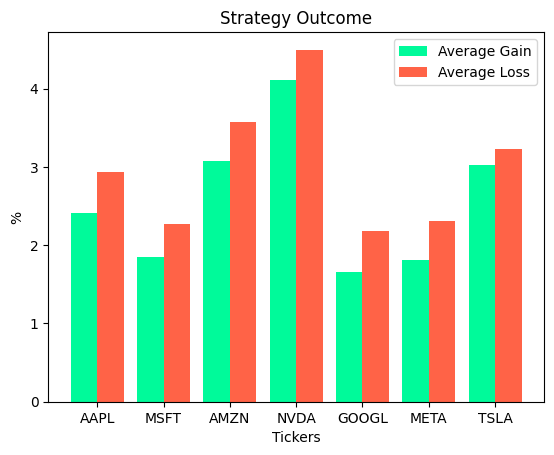

In [149]:
# Plotting the average gain and average loss
X_axis = np.arange(len(tickers))

avg_gain_list = [value for value in avg_gain.values()]
avg_loss_list = [value for value in avg_loss.values()]
  
plt.bar(X_axis - 0.2, avg_gain_list, 0.4, label = 'Average Gain', color='mediumspringgreen')
plt.bar(X_axis + 0.2, avg_loss_list, 0.4, label = 'Average Loss', color='tomato')
  
plt.xticks(X_axis, tickers)
plt.xlabel("Tickers")
plt.ylabel("%")
plt.title("Strategy Outcome")
plt.legend()
plt.show()

In [150]:
# calculating the expected value for each company
expected_value = create_dict()
for ticker in tickers:
    result = (probability_dict[ticker] * avg_gain[ticker]) - ((1 - probability_dict[ticker]) * avg_loss[ticker])
    expected_value[ticker] = (probability_dict[ticker] * avg_gain[ticker]) - ((1 - probability_dict[ticker]) * avg_loss[ticker])

expected_value

{'AAPL': 2.220446049250313e-16,
 'MSFT': -2.220446049250313e-16,
 'AMZN': 0.0,
 'NVDA': -4.440892098500626e-16,
 'GOOGL': 2.220446049250313e-16,
 'META': 2.220446049250313e-16,
 'TSLA': 2.220446049250313e-16}

## Expected value:
| Interval |    AAPL     |     MSFT    |    AMZN     |    NVDA     |    GOOGL    |    META     |    TSLA     | 
| -------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
|  Daily   | 2.2204e-16  | 0.0         | -2.2204e-16 | -4.4409e-16 | 2.2204e-16  | 2.2204e-16  | 2.2204e-16  | 
|  Weekly  | 0.0         | -4.4409e-16 | 4.4409e-16  | -4.4409e-16 | 0.0         | -4.4409e-16 | 0.0         |
|  Monthly | -8.8818e-16 | 8.8818e-16  | 0.0         | -8.8818e-16 | -4.4409e-16 | 0.0         | 0.0         |